# Results and visualizations
This notebook contains a set of visualizations and graphs based on the different hypotheses and conducted experiments against them. The format is as follows:
- Import of required packages and initialization of parameters that are used throughout the notebook
- A section is dedicated for each of the hypotheses of the thesis that contains more information about the hypothesis, the experiments and the respective results, along with visualizations and graphs.

In [1]:
# Imports
import os
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from datetime import timedelta as td

## Experiment metadata
In the output directory of each experiment, there is `metadata.csv` file that stores the configuration of the individual runs for each experiment:
- **dataset_name**: the name of the dataset
- **dataset_iter**: specific train/test split of the dataset used
- **search_type**: `'random', 'edb' or 'smac'`
- **num_classifiers**: list of PyOD classifiers used
- **validation_strategy**: `stratified` or `balanced`
- **validation_size**: `20`, `50`, `100`, `200` or `400`
- **total_budget**: total budget in seconds
- **per_run_budget**: budget per individual run in seconds

From these values, the aggregated experiment parameters are calculated and passed later on to the plotting function for each hypothesis.

In [2]:
# Output directories
output_dirname = 'experiment2'
output_path = os.path.join(Path.cwd().parent, 'output', output_dirname)
output_performance_path = os.path.join(output_path, 'performance')
# Import metadata
metadata_filepath = os.path.join(output_path, 'metadata.csv')
metadata_df = pd.read_csv(metadata_filepath)
# Remove individual edb (random search) runs
metadata_df = metadata_df[metadata_df['total_budget'] != 30]
# Extract experiment parameters
total_budget = metadata_df.total_budget[0]
dataset_list = list(metadata_df.dataset_name.unique())
validation_strategy_list = list(metadata_df.validation_strategy.unique())
validation_size_list = list(metadata_df.validation_size.unique())
# Print the parameters
print('Total budget:', total_budget)
print('Dataset list:', dataset_list)
print('Validation strategy list:', validation_strategy_list)
print('Validation size list:', validation_size_list)

Total budget: 150
Dataset list: ['ALOI', 'Annthyroid', 'Cardiotocography']
Validation strategy list: ['stratified']
Validation size list: [20, 50, 100, 200]


## PART 1 - Hypothesis 1: Guided vs. unguided search

**Statement**: *Guided search algorithms (SMAC) shall have better performance than unguided search (random search, equally distributed budget search).*

**Comments**:
- The comparison should be done per dataset.
- The comparison should be done for a specified validation strategy (e.g. stratified) and size (e.g. a percentage 30% of the original training set).

## Generic plotting functions
The plotting functions used in the hypotheses sections. were made generic so the generated plots can depend only on the input arguments:
- **output_performance_path**: path to the `performance` directory
- **dataset_list**: list of datasets used in the experiment
- **total_budget**: total budget in seconds
- **validation_strategy_list**: `['stratified', 'balanced']`
- **validation_size_list**: `[20, 50, 100, 200, 400]`
- **eval_type**: `opt` or `test`
- **plot_color_list**: used for consistent coloring

In [5]:
# Plotting function for H1
def plot_h1_results(
    output_performance_path, # str
    dataset_list, # list(str)
    total_budget, # int
    validation_strategy, # int
    validation_size, # int
    eval_type, # str
    color_list # list(str)
):
    # Figure
    width = 6 * len(dataset_list)
    height = 6 * len(dataset_list)
    fig = plt.figure(
        figsize=(width, height)) # grid dimensions
    fig.subplots_adjust(
        wspace=0.4, hspace=0.3) # space between plots
    #fig.suptitle(
    #    'Performance on {} set for {} validation set of size {}'\
    #    .format(
    #        eval_type,
    #        validation_strategy,
    #        validation_size),
    #    fontsize=15
    #)
    # Plots
    for i, dataset in enumerate(dataset_list):
        for filename in os.listdir(output_performance_path):
            if dataset in filename \
            and validation_strategy in filename \
            and str(validation_size) in filename:
                # import performance data as DataFrame
                perf_df = pd.read_csv(
                    os.path.join(
                        output_performance_path, filename),
                    parse_dates=['Timestamp']
                )
                # x-axis (time)
                x = (perf_df.Timestamp-perf_df.Timestamp[0]).\
                    apply(td.total_seconds)
                x.at[x.shape[0]] = total_budget
                # score based on eval_type
                if eval_type == 'opt':
                    y = perf_df.single_best_optimization_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                elif eval_type == 'test':
                    y = perf_df.single_best_test_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                # plot
                label = filename.split('_')[2]
                ax = plt.subplot(3, 3, i + 1)
                ax.set_ylim([0.5, 1.])
                ax.set_xlabel('seconds')
                ax.set_ylabel('score')
                ax.plot(x, y, label=label, color=color_list[label])
                ax.grid()
                handles, labels = ax.get_legend_handles_labels()
                labels, handles = zip(
                    *sorted(zip(labels, handles), key=lambda t: t[0]))
                ax.legend(handles, labels, loc='lower right')
                plt.title(dataset)

In [7]:
# Parameters for H1
validation_size_1 = 100
color_list_1 = {
    'edb': 'orange',
    'random': 'green',
    'smac': 'royalblue',
}

### PART 1.A - Performance for stratified validation sets
The below graphs display the optimization performance, i.e. the performance on the validation set used in Bayesian Optimization, per dataset, for the case of `stratified` validation sets.

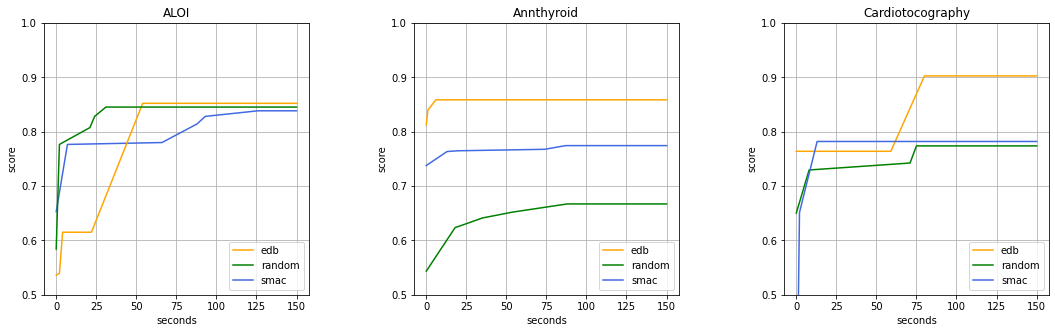

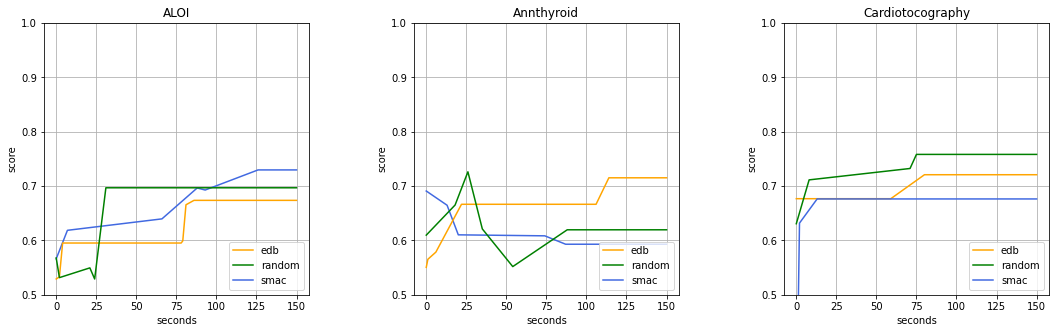

In [8]:
# Parameters for H1.A
validation_strategy_1A = 'stratified'
# Plot optimization performance
plot_h1_results(
    output_performance_path,
    dataset_list,
    total_budget,
    validation_strategy_1A,
    validation_size_1,
    'opt',
    color_list_1
)
# Plot test set performance
plot_h1_results(
    output_performance_path,
    dataset_list,
    total_budget,
    validation_strategy_1A,
    validation_size_1,
    'test',
    color_list_1
)

### Part 1.B - Performance for balanced validation sets
The below graphs display the test set performance per dataset

In [9]:
# Parameters for H1.B
validation_strategy_1B = 'balanced'
# Plot optimization performance
plot_h1_results(
    output_performance_path,
    dataset_list,
    total_budget,
    validation_strategy_1B,
    validation_size_1,
    'opt',
    color_list_1
)
# Plot test set performance
plot_h1_results(
    output_performance_path,
    dataset_list,
    total_budget,
    validation_strategy_1B,
    validation_size_1,
    'test',
    color_list_1
)

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

## PART 2 - Hypothesis 2: Stratified vs. balanced validation sets

**Statement**: *Stratified validation sets shall result in better performance compared to biased (balanced) validation sets.*

**Comments**:
- The expectation of better performance when using stratified validation sets stems from the fact that stratified-sampled validation sets better represent the actual data distribution.
- The comparison should be done per dataset.
- The comparison should be done per search algorithm (equally distributed budget, random, smac)
- The comparison should be done for a specified validation set size (e.g. 30% of the original training set).

In [12]:
# Plotting function for H2
def plot_h2_results(
    output_performance_path, # str
    dataset_list, # list(str)
    search_algorithm, # str
    total_budget, # int
    validation_size, # int
    eval_type, # str
    color_list # list(str) 
):
    # Figure
    width = 6 * len(dataset_list)
    height = 6 * len(dataset_list)
    fig = plt.figure(
        figsize=(width, height)) # grid dimensions
    fig.subplots_adjust(
        wspace=0.4, hspace=0.3) # space between plots
    #fig.suptitle(
    #    'Performance on {} set for {} validation set of size {}'\
    #    .format(
    #        eval_type,
    #        validation_strategy,
    #        validation_size),
    #    fontsize=15
    #)
    # Plots
    for i, dataset in enumerate(dataset_list):
        for filename in os.listdir(output_performance_path):
            if dataset in filename and \
            search_algorithm in filename and \
            str(validation_size) in filename:
                # import performance data as DataFrame
                perf_df = pd.read_csv(
                    os.path.join(
                        output_performance_path, filename),
                    parse_dates=['Timestamp']
                )
                # x-axis (time)
                x = (perf_df.Timestamp-perf_df.Timestamp[0]).apply(td.total_seconds)
                x.at[x.shape[0]] = total_budget
                # score based on eval_type
                if eval_type == 'opt':
                    y = perf_df.single_best_optimization_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                elif eval_type == 'test':
                    y = perf_df.single_best_test_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                # plot
                label = filename.split('_')[3]
                ax = plt.subplot(3, 3, i + 1)
                ax.set_ylim([0.5, 1.])
                ax.set_xlabel('seconds')
                ax.set_ylabel('score')
                ax.plot(x, y, label=label, color=color_list[label])
                ax.grid()
                handles, labels = ax.get_legend_handles_labels()
                labels, handles = zip(
                    *sorted(zip(labels, handles), key=lambda t: t[0]))
                ax.legend(handles, labels, loc='lower right')
                plt.title(dataset)

In [10]:
# Parameters for H2
validation_size_2 = 200
color_list_2 = {
    'stratified': 'orange',
    'balanced': 'green',
}

### Part 2.A - SMAC Search
The below graphs display the test set performance per dataset for the SMAC search

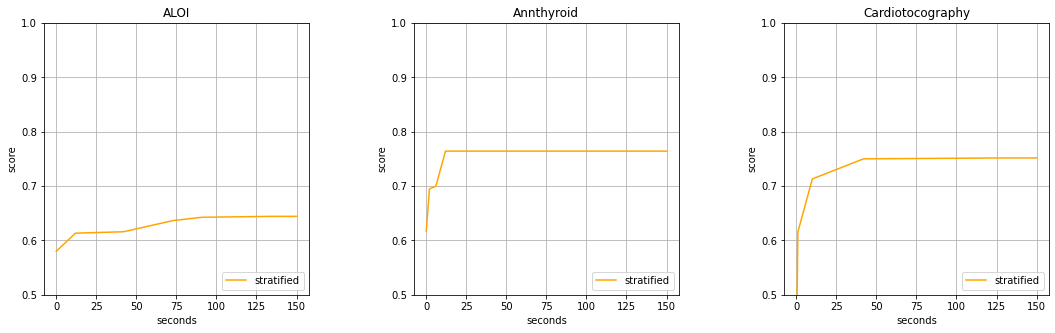

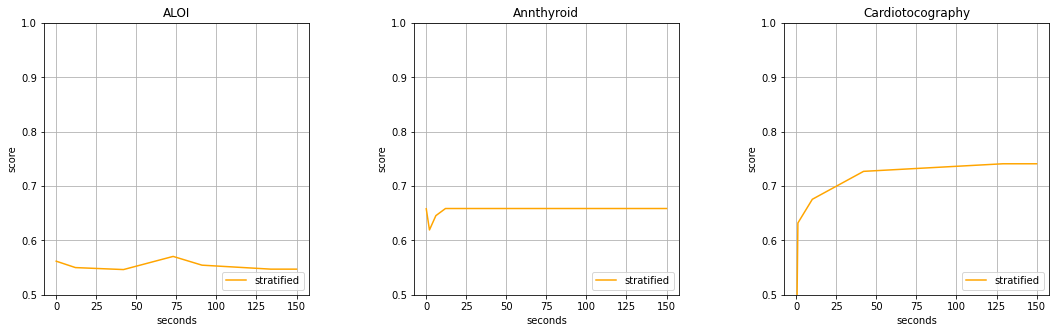

In [13]:
# Parameters for H2.A
search_algorithm_2A = 'smac'
# Plot optimization performance
plot_h2_results(
    output_performance_path,
    dataset_list,
    search_algorithm_2A,
    total_budget,
    validation_size_2,
    'opt',
    color_list_2
)
# Plot test set performance
plot_h2_results(
    output_performance_path,
    dataset_list,
    search_algorithm_2A,
    total_budget,
    validation_size_2,
    'test',
    color_list_2
)

### Part 2.B - Random Search
The below graphs display the test set performance per dataset for *Random Search*

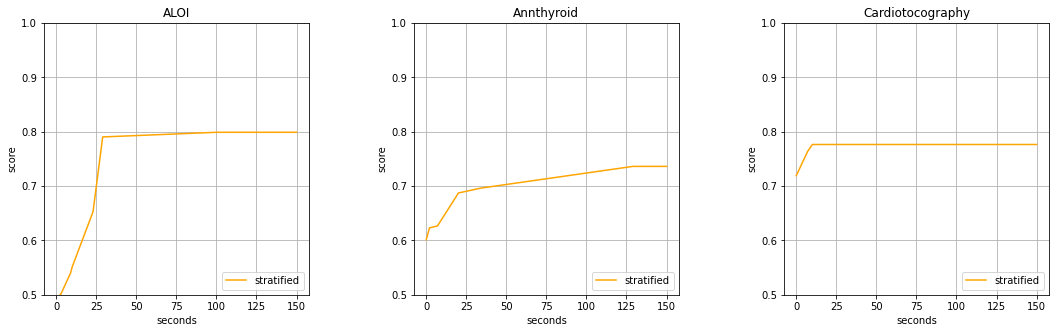

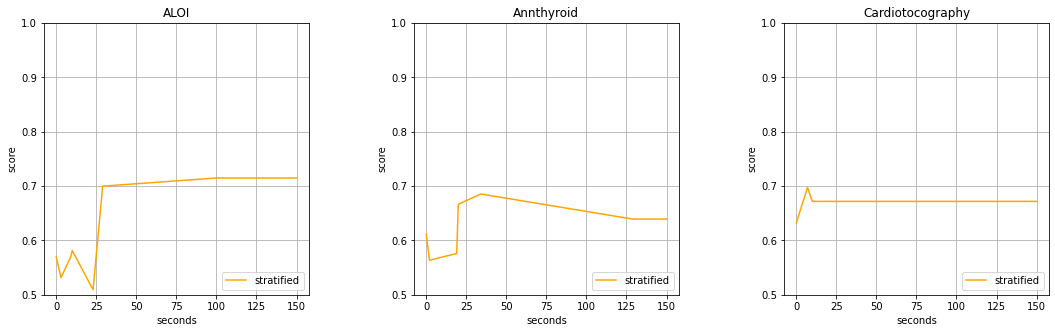

In [14]:
# Parameters for H2.B
search_algorithm_2B = 'random'
# Plot optimization performance
plot_h2_results(
    output_performance_path,
    dataset_list,
    search_algorithm_2B,
    total_budget,
    validation_size_2,
    'opt',
    color_list_2
)
# Plot test set performance
plot_h2_results(
    output_performance_path,
    dataset_list,
    search_algorithm_2B,
    total_budget,
    validation_size_2,
    'test',
    color_list_2
)

### Part 2.C - Equally Distributed Budget Search
The below graphs display the test set performance per dataset for the *Equally Distributed Budget Search*

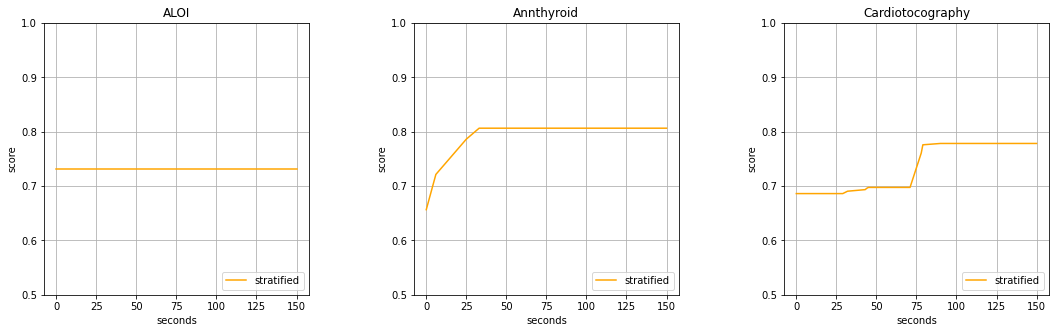

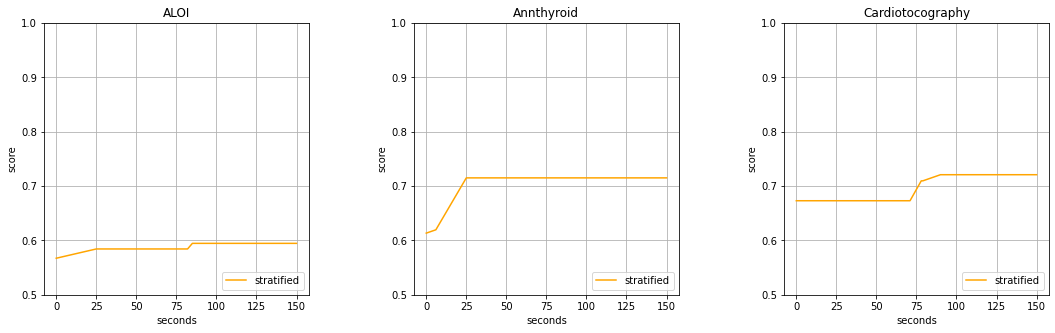

In [15]:
# Parameters for H2.C
search_algorithm_2C = 'edb'
# Plot optimization performance
plot_h2_results(
    output_performance_path,
    dataset_list,
    search_algorithm_2C,
    total_budget,
    validation_size_2,
    'opt',
    color_list_2
)
# Plot test set performance
plot_h2_results(
    output_performance_path,
    dataset_list,
    search_algorithm_2C,
    total_budget,
    validation_size_2,
    'test',
    color_list_2
)

## Hypothesis 3 - Larger vs. smaller validation sets

**Statement**: *Larger validation sets shall result in better performance compared to smaller validation sets.*

**Comments**:
- Validation set sizes to compare: 20, 50, 100, 200, 400
- Comparison should be done per dataset
- Comparison should be done per search algorithm

In [16]:
# Plotting function for H3
def plot_h3_results(
    output_performance_path, # str
    dataset_list, # list(str)
    search_algorithm, # str
    total_budget, # int
    validation_strategy, # str
    validation_size_list, # list(int)
    eval_type, # str
    color_list # list(str) 
):
    # Figure
    width = 6 * len(dataset_list)
    height = 6 * len(dataset_list)
    fig = plt.figure(
        figsize=(width, height)) # grid dimensions
    fig.subplots_adjust(
        wspace=0.4, hspace=0.3) # space between plots
    #fig.suptitle(
    #    'Performance on {} set for {} validation set of size {}'\
    #    .format(
    #        eval_type,
    #        validation_strategy,
    #        validation_size),
    #    fontsize=15
    #)
    # Plots
    for i, dataset in enumerate(dataset_list):
        for filename in os.listdir(output_performance_path):
            if (dataset in filename and \
                search_algorithm in filename and \
                validation_strategy in filename \
                and any(str(size) in filename for size in validation_size_list)):
                #print(filename)
                # import performance data as DataFrame
                perf_df = pd.read_csv(os.path.join(output_performance_path, filename), parse_dates=['Timestamp'])
                # x-axis (time)
                x = (perf_df.Timestamp-perf_df.Timestamp[0]).apply(td.total_seconds)
                x.at[x.shape[0]] = total_budget
                # score based on eval_type
                if eval_type == 'opt':
                    y = perf_df.single_best_optimization_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                elif eval_type == 'test':
                    y = perf_df.single_best_test_score
                    y.at[y.shape[0]] = y.at[y.shape[0]-1]
                # plot
                label = int(filename.split('_')[4].split('.')[0])
                ax = plt.subplot(3, 3, i + 1)
                ax.set_ylim([0.2, 1.])
                ax.set_xlabel('seconds')
                ax.set_ylabel('score')
                ax.plot(x, y, label=label, color=color_list[label])
                ax.grid()
                handles, labels = ax.get_legend_handles_labels()
                labels = [int(l) for l in labels] # convert to integer for sorting
                labels, handles = zip(
                *sorted(zip(labels, handles), key=lambda t: t[0]))
                ax.legend(handles, labels, loc='lower right')
                plt.title(dataset)

In [17]:
# Parameters for H3
validation_strategy_3 = 'stratified'
color_list_3 = {
    20: 'red',
    50: 'orange',
    100: 'green',
    200: 'royalblue',
    400: 'gray',
}

### Part 3.A - SMAC Search
The below graphs display the test set performance per dataset for the **SMAC Search**

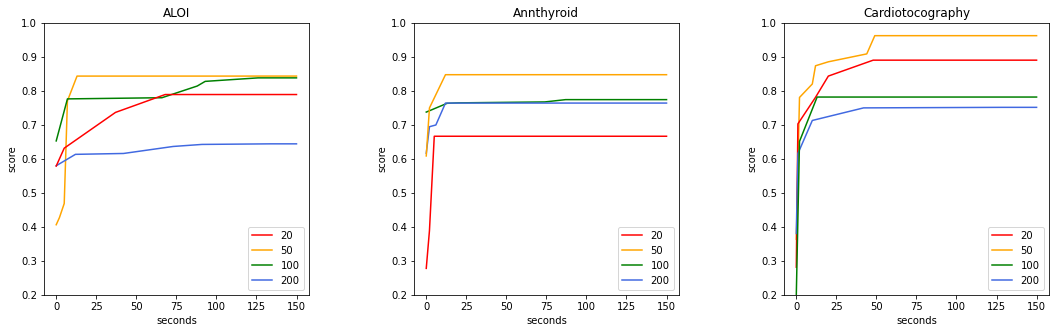

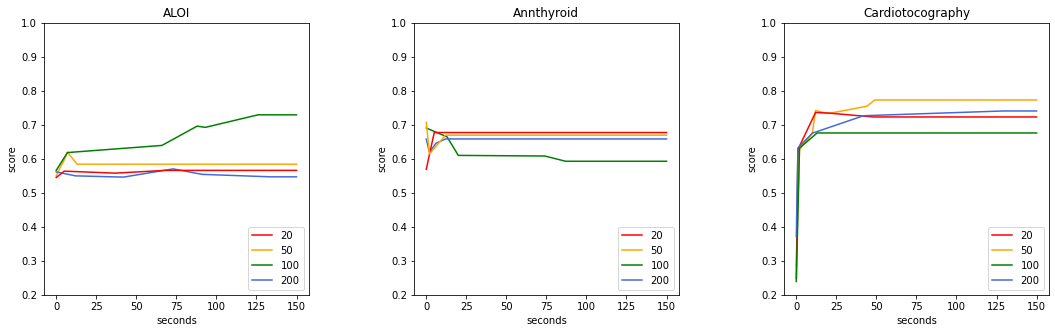

In [19]:
# Parameters for H3.A
search_algorithm_3A = 'smac'
# Plot optimization performance
plot_h3_results(
    output_performance_path,
    dataset_list,
    search_algorithm_3A,
    total_budget,
    validation_strategy_3,
    validation_size_list,
    'opt',
    color_list_3
)
# Plot test set performance
plot_h3_results(
    output_performance_path,
    dataset_list,
    search_algorithm_3A,
    total_budget,
    validation_strategy_3,
    validation_size_list,
    'test',
    color_list_3
)

### Part 3.B - Random Search
The below graphs display the test set performance per dataset for **Random Search**

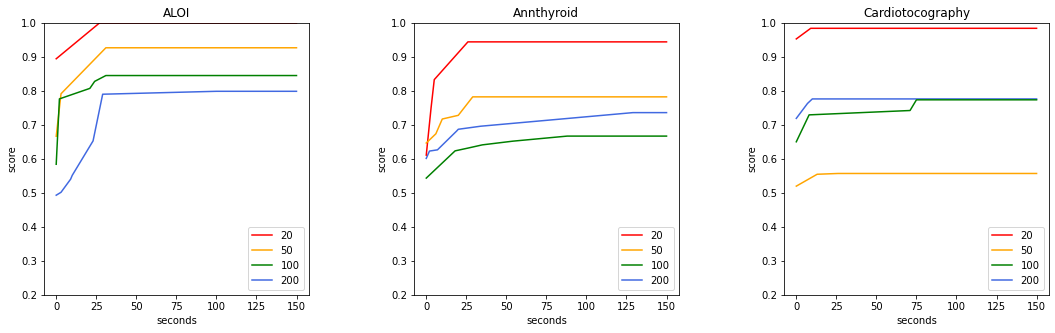

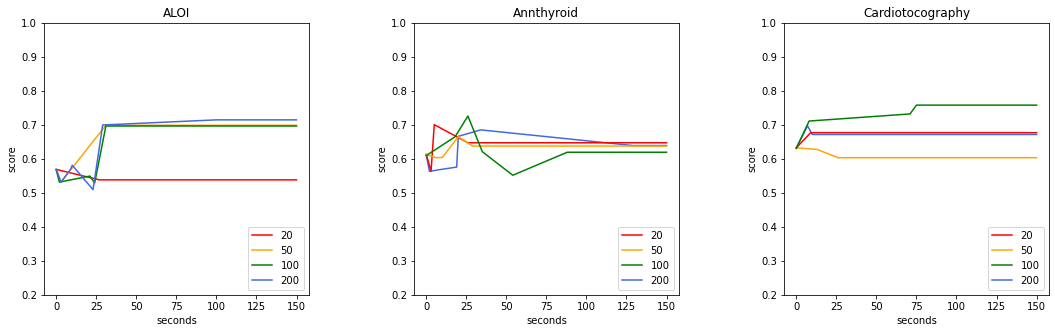

In [20]:
# Parameters for H3.B
search_algorithm_3B = 'random'
# Plot optimization performance
plot_h3_results(
    output_performance_path,
    dataset_list,
    search_algorithm_3B,
    total_budget,
    validation_strategy_3,
    validation_size_list,
    'opt',
    color_list_3
)
# Plot test set performance
plot_h3_results(
    output_performance_path,
    dataset_list,
    search_algorithm_3B,
    total_budget,
    validation_strategy_3,
    validation_size_list,
    'test',
    color_list_3
)

### Part 3.C - Equally Distributed Budget Search
The below graphs display the test set performance per dataset for the **Equally Distributed Budget Search**

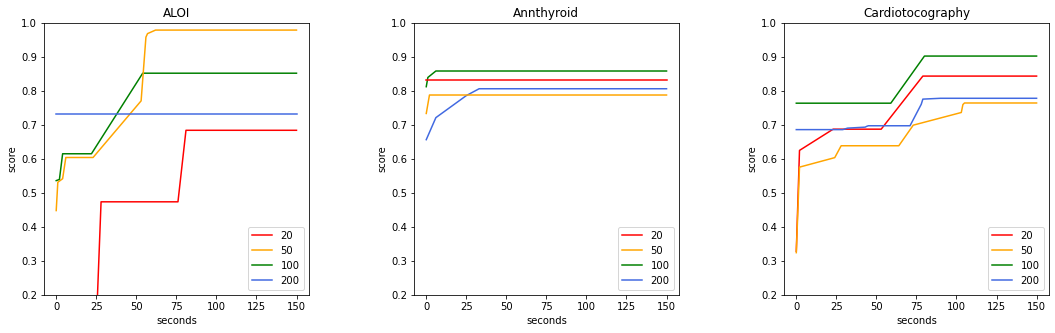

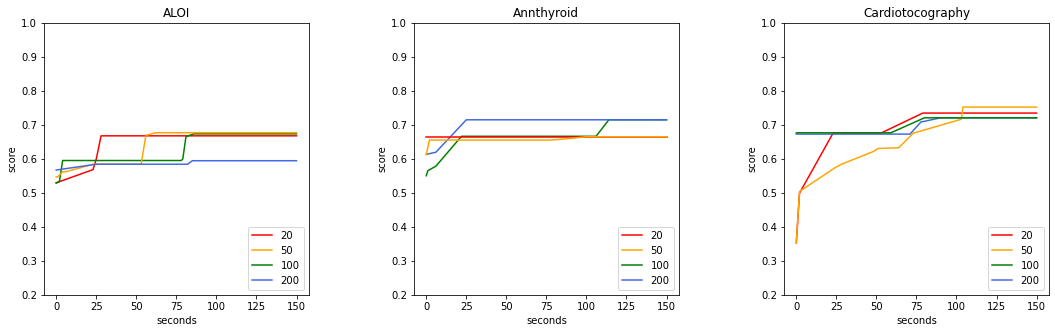

In [21]:
# Parameters for H3.C
search_algorithm_3C = 'edb'
# Plot optimization performance
plot_h3_results(
    output_performance_path,
    dataset_list,
    search_algorithm_3C,
    total_budget,
    validation_strategy_3,
    validation_size_list,
    'opt',
    color_list_3
)
# Plot test set performance
plot_h3_results(
    output_performance_path,
    dataset_list,
    search_algorithm_3C,
    total_budget,
    validation_strategy_3,
    validation_size_list,
    'test',
    color_list_3
)